In [ ]:
from flask import Flask, request, jsonify
import joblib

# تحميل النموذج والمتجه
model = joblib.load('PassiveAggressiveClassifier.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

app = Flask(__name__)

@app.route('/')
def home():
    return "Hello, World!"

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()  # استلام النص من الـ request
        if data is None:
            return jsonify({'error': 'No input data provided'}), 400
        
        text = data.get('text', '')
        if text == '':
            return jsonify({'error': 'No text provided'}), 400

        # تحويل النص إلى تمثيل TF-IDF
        vectorized_text = vectorizer.transform([text])
        
        # التنبؤ بالنتيجة باستخدام النموذج
        prediction = model.predict(vectorized_text)[0]

        return jsonify({'prediction': prediction})
    except Exception as e:
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5001)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5001
 * Running on http://192.168.1.8:5001
Press CTRL+C to quit
127.0.0.1 - - [19/Oct/2024 02:15:35] "GET / HTTP/1.1" 200 -
192.168.1.8 - - [19/Oct/2024 02:17:44] "POST /predict HTTP/1.1" 200 -
192.168.1.8 - - [19/Oct/2024 02:18:01] "POST /predict HTTP/1.1" 200 -
192.168.1.8 - - [19/Oct/2024 02:18:08] "POST /predict HTTP/1.1" 200 -
192.168.1.8 - - [19/Oct/2024 02:18:16] "POST /predict HTTP/1.1" 200 -
192.168.1.8 - - [19/Oct/2024 02:18:26] "POST /predict HTTP/1.1" 200 -
192.168.1.8 - - [19/Oct/2024 02:18:35] "POST /predict HTTP/1.1" 200 -
192.168.1.8 - - [19/Oct/2024 02:18:43] "POST /predict HTTP/1.1" 200 -
192.168.1.8 - - [19/Oct/2024 02:18:52] "POST /predict HTTP/1.1" 200 -
192.168.1.8 - - [19/Oct/2024 02:19:12] "POST /predict HTTP/1.1" 200 -
192.168.1.8 - - [19/Oct/2024 02:19:24] "POST /predict HTTP/1.1" 200 -
192.168.1.8 - - [19/Oct/2024 02:20:08] "POST /predict HTTP/1.1" 200 -
192.168.1.8 - - [19/Oct/2024 02:20:19

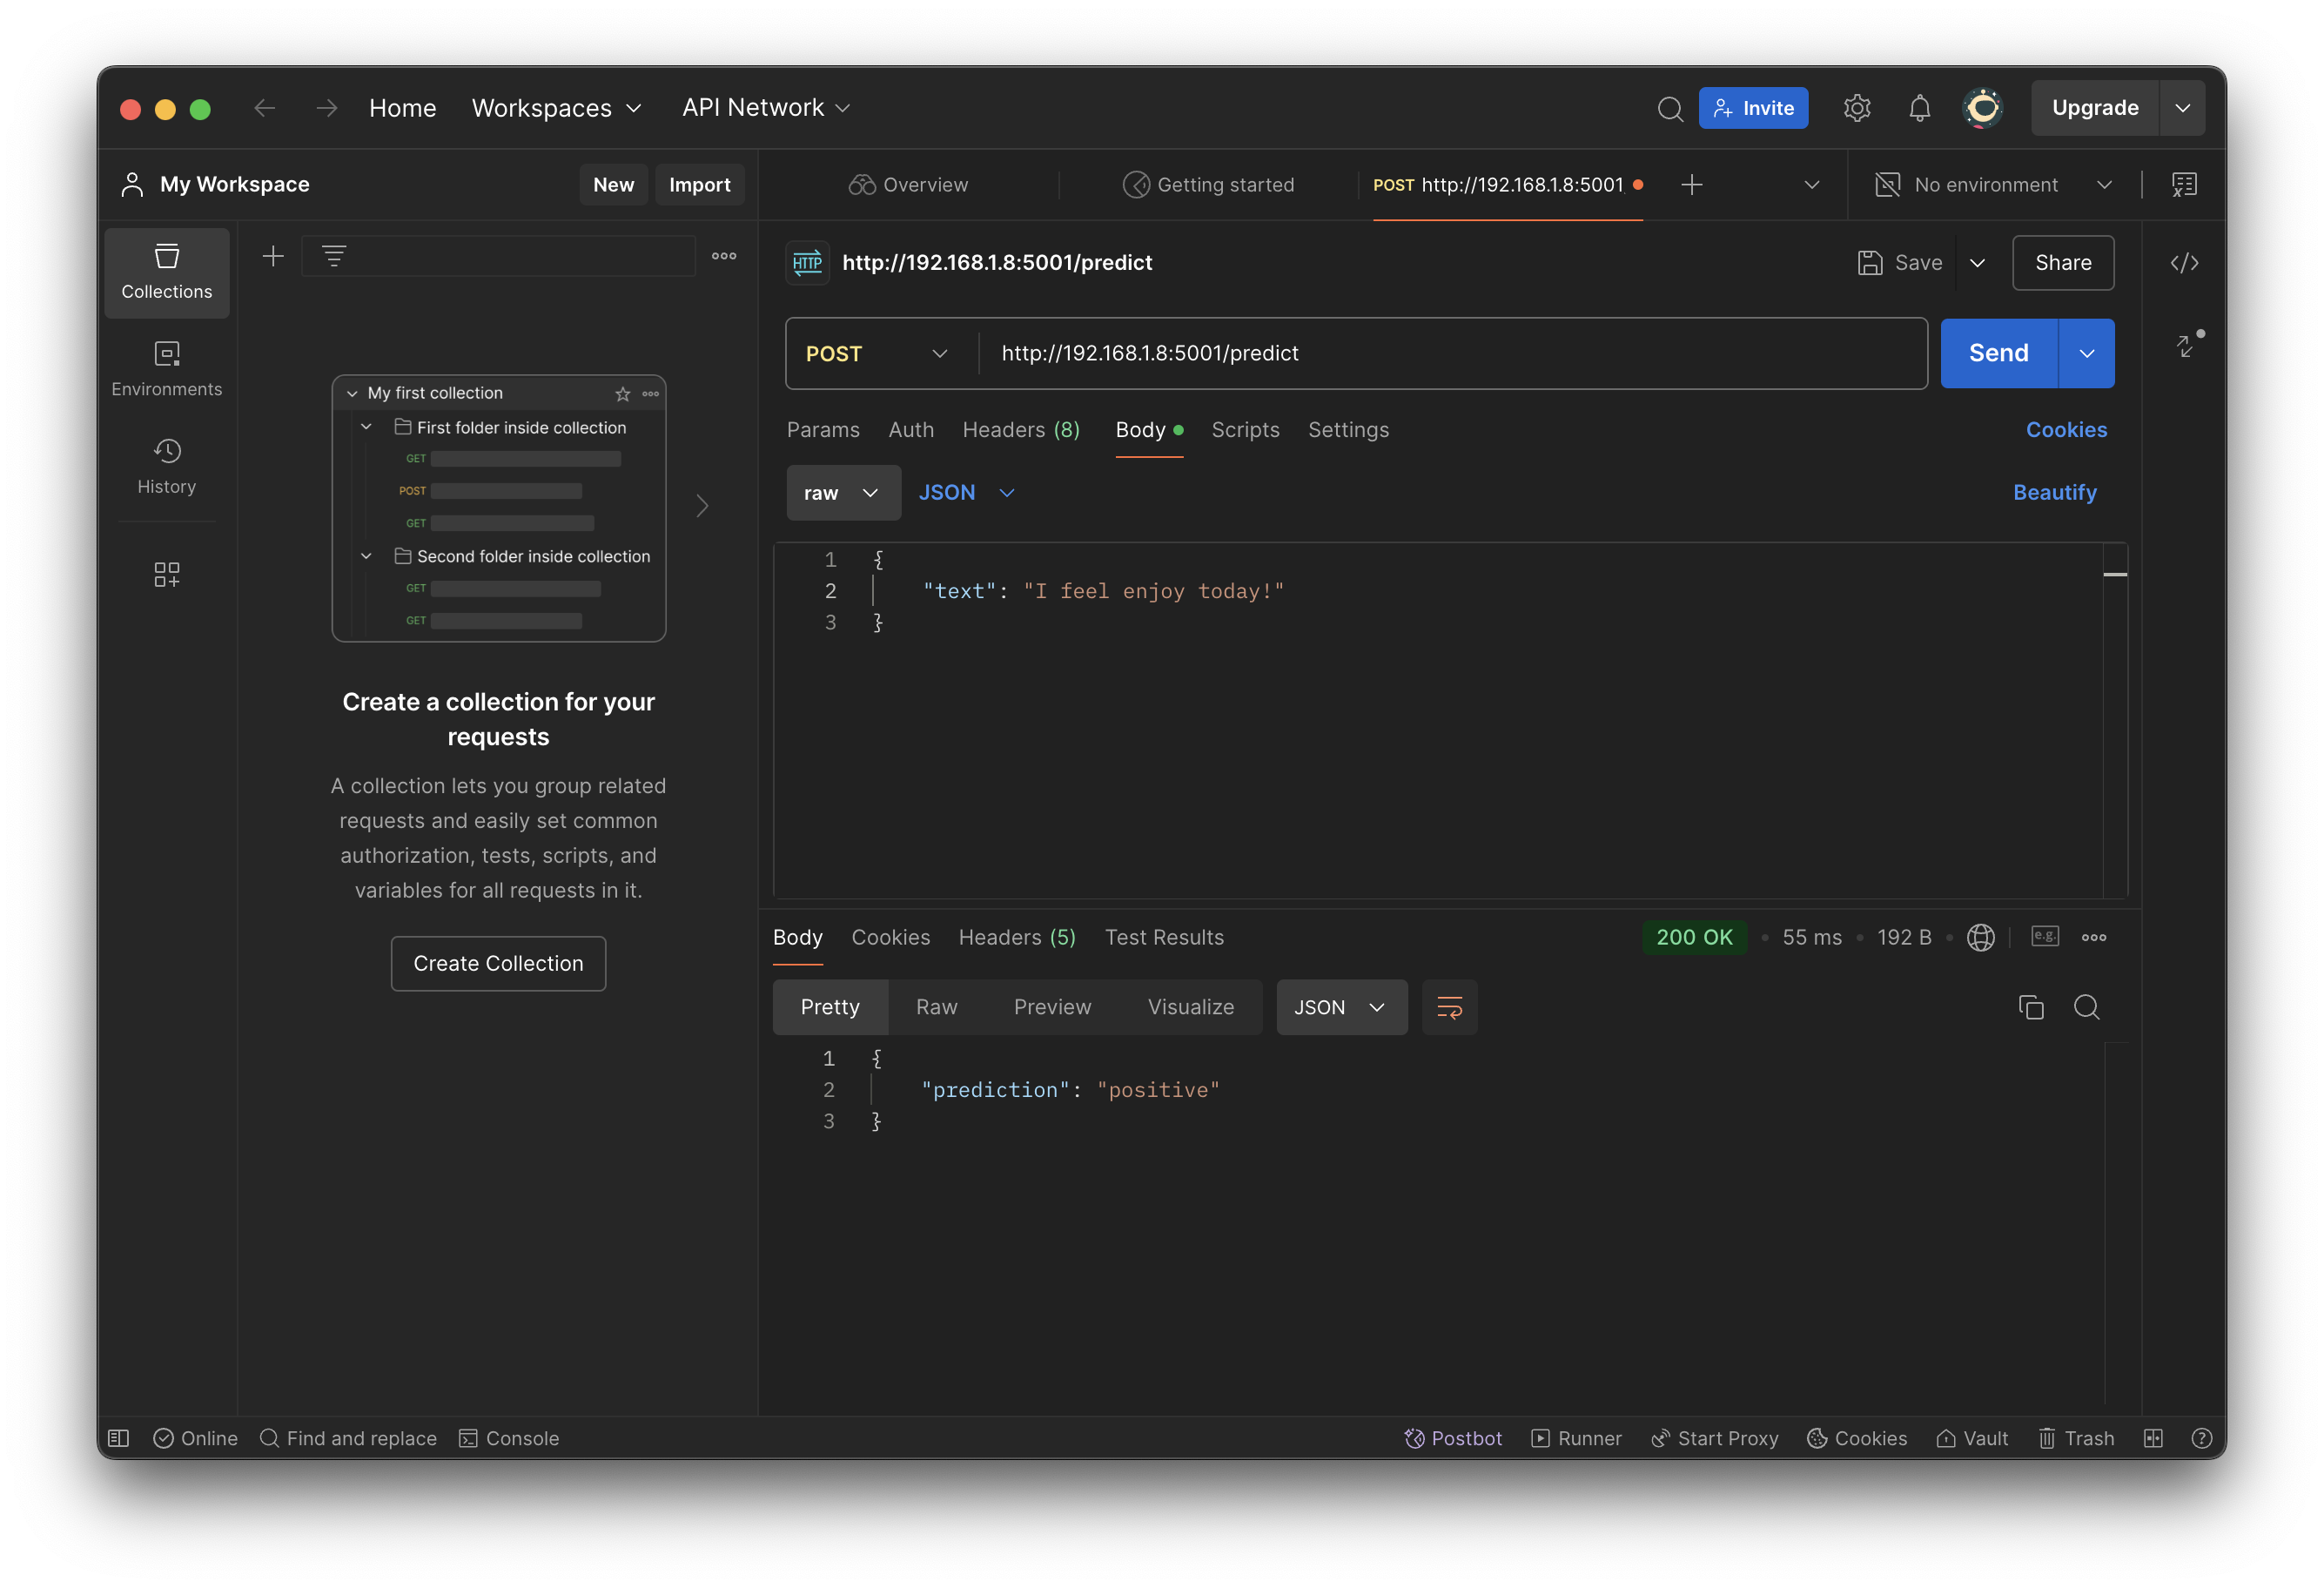